In [11]:
# RUN THIS COMMAND ONLY IF YOU USE GOOGLE COLAB.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
# RUN THIS COMMAND ONLY IF YOU USE GOOGLE COLAB.
%cd drive/MyDrive/TechLabs/02_Data\ Manipulation/Part\ C\ -\ Pandas

[Errno 2] No such file or directory: 'drive/MyDrive/TechLabs/02_Data Manipulation/Part C - Pandas'
/content/drive/MyDrive/TechLabs/02_Data Manipulation/Part C - Pandas


In [38]:
# This is the convention used to import Pandas.
import pandas as pd
import numpy as np

In [39]:
waste = pd.read_csv("data/cei_pc031_page_linear.csv")
recycle = pd.read_csv("data/sdg_11_60_page_linear.csv")
population = pd.read_csv("data/demo_pjan__custom_5181490_page_linear.csv")

In [40]:
#Dataset 1: Generation of municipal waste per capita in kg (Europe)
waste.head()

,DATAFLOW,LAST UPDATE,freq,wst_oper,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:CEI_PC031(1.0),17/02/23 23:00:00,A,GEN,KG_HAB,AL,2013,325,s
1,ESTAT:CEI_PC031(1.0),17/02/23 23:00:00,A,GEN,KG_HAB,AL,2014,425,s
2,ESTAT:CEI_PC031(1.0),17/02/23 23:00:00,A,GEN,KG_HAB,AL,2015,491,s
3,ESTAT:CEI_PC031(1.0),17/02/23 23:00:00,A,GEN,KG_HAB,AL,2016,452,e
4,ESTAT:CEI_PC031(1.0),17/02/23 23:00:00,A,GEN,KG_HAB,AL,2017,436,e


In [41]:
#Dataset 2: Recycling rate of municipal waste in % (Europe)
recycle.head()

,DATAFLOW,LAST UPDATE,freq,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:SDG_11_60(1.0),13/01/23 23:00:00,A,PC,AL,2020,18.1,NaN
1,ESTAT:SDG_11_60(1.0),13/01/23 23:00:00,A,PC,AL,2021,18.7,NaN
2,ESTAT:SDG_11_60(1.0),13/01/23 23:00:00,A,PC,AT,2000,63.4,NaN
3,ESTAT:SDG_11_60(1.0),13/01/23 23:00:00,A,PC,AT,2001,64.3,e
4,ESTAT:SDG_11_60(1.0),13/01/23 23:00:00,A,PC,AT,2002,62.5,e


In [43]:
#Dataset 3: Population on 1 January by age and sex (Europe)
population.head()

,DATAFLOW,LAST UPDATE,freq,unit,age,sex,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:DEMO_PJAN(1.0),22/02/23 11:00:00,A,NR,TOTAL,T,AD,2000,65971.0,NaN
1,ESTAT:DEMO_PJAN(1.0),22/02/23 11:00:00,A,NR,TOTAL,T,AD,2001,65844.0,NaN
2,ESTAT:DEMO_PJAN(1.0),22/02/23 11:00:00,A,NR,TOTAL,T,AD,2002,66334.0,NaN
3,ESTAT:DEMO_PJAN(1.0),22/02/23 11:00:00,A,NR,TOTAL,T,AD,2003,67159.0,NaN
4,ESTAT:DEMO_PJAN(1.0),22/02/23 11:00:00,A,NR,TOTAL,T,AD,2004,72320.0,NaN


In [44]:
#delete irrelevant columns for the data analysis from both datasets
waste.drop("DATAFLOW", inplace=True, axis=1)
waste.drop("LAST UPDATE", inplace=True, axis=1)
waste.drop("freq", inplace=True, axis=1)
waste.drop("wst_oper", inplace=True, axis=1)
waste.drop("unit", inplace=True, axis=1)
waste.drop("OBS_FLAG", inplace=True, axis=1)
recycle.drop("DATAFLOW", inplace=True, axis=1)
recycle.drop("LAST UPDATE", inplace=True, axis=1)
recycle.drop("freq", inplace=True, axis=1)
recycle.drop("unit", inplace=True, axis=1)
recycle.drop("OBS_FLAG", inplace=True, axis=1)
population.drop("DATAFLOW", inplace=True, axis=1)
population.drop("LAST UPDATE", inplace=True, axis=1)
population.drop("freq", inplace=True, axis=1)
population.drop("unit", inplace=True, axis=1)
population.drop("OBS_FLAG", inplace=True, axis=1)
population.drop("sex", inplace=True, axis=1) #because all sex
population.drop("age", inplace=True, axis=1) #because all ages

In [45]:
#rename columns in both datasets
waste.rename(columns={"geo": "region_id", "TIME_PERIOD":"year", "OBS_VALUE":"municipal_waste_per_capita_kg"}, inplace=True)
recycle.rename(columns={"geo": "region_id", "TIME_PERIOD":"year", "OBS_VALUE":"recycling_rate_municipal_waste_percent"}, inplace=True)
population.rename(columns={"geo": "region_id", "TIME_PERIOD":"year", "OBS_VALUE":"population"}, inplace=True)

In [47]:
#INNER JOIN ("recycle" + "waste") --> set of records that have a mutual value in the specified joining column(s)
join_1=waste.merge(recycle, on =["region_id", "year"])
join_1.head()

,region_id,year,municipal_waste_per_capita_kg,recycling_rate_municipal_waste_percent
0,AL,2020,369,18.1
1,AL,2021,311,18.7
2,AT,2000,580,63.4
3,AT,2001,576,64.3
4,AT,2002,608,62.5


In [49]:
#INNER JOIN ("recycle" + "waste"+"population")
joined=join_1.merge(population, on =["region_id", "year"])
joined.head()

,region_id,year,municipal_waste_per_capita_kg,recycling_rate_municipal_waste_percent,population
0,AL,2020,369,18.1,2845955.0
1,AL,2021,311,18.7,2829741.0
2,AT,2000,580,63.4,8002186.0
3,AT,2001,576,64.3,8020946.0
4,AT,2002,608,62.5,8063640.0


In [50]:
#unique values of series object ["region_id"]
joined["region_id"].unique()

array(['AL', 'AT', 'BA', 'BE', 'BG', 'CH', 'CY', 'CZ', 'DE', 'DK', 'EE',
       'EL', 'ES', 'EU27_2020', 'FI', 'FR', 'HR', 'HU', 'IE', 'IS', 'IT',
       'LT', 'LU', 'LV', 'ME', 'MK', 'MT', 'NL', 'NO', 'PL', 'PT', 'RO',
       'RS', 'SE', 'SI', 'SK', 'TR', 'UK', 'XK'], dtype=object)

In [57]:
#add a new column and assign the country name to it
joined["country_name"]=joined.region_id.replace({"EU27_2020": "European Union - 27 countries (from 2020)",
"BE": "Belgium",
"BG": "Bulgaria",
"CZ": "Czechia",
"DK": "Denmark",
"DE": "Germany",
"EE": "Estonia",
"IE": "Ireland",
"EL": "Greece",
"ES": "Spain",
"FR": "France",
"HR": "Croatia",
"CY": "Cyprus",
"IT": "Italy",
"IS": "Iceland",
"LV": "Latvia",
"LT": "Lithuania",
"LU": "Luxembourg",
"HU": "Hungary",
"MT": "Malta",
"NL": "Netherlands",
"AT": "Austria",
"PL": "Poland",
"PT": "Portugal",
"RO": "Romania",
"SI": "Slovenia",
"SK": "Slovakia",
"FI": "Finland",
"SE": "Sweden",
"IS": "Iceland",
"LI": "Lichtenstein",
"NO": "Norway",
"CH": "Switzerland",
"UK": "United Kingdom",
"BA": "Bosnia and Herzegovina",
"ME": "Montenegro",
"MK": "North Macedonia",
"AL": "Albania",
"RS": "Serbia",
"TR": "Türkiye",
"XK": "Kosovo"
})

In [62]:
joined["country_name"].nunique()

39

In [63]:
joined["region_id"].nunique()

39

In [64]:
#move the column ["country_name"] before ["region_id"]
column_to_move = joined.pop("country_name")
joined.insert(0, "country_name", column_to_move)
joined.head()

,country_name,region_id,year,municipal_waste_per_capita_kg,recycling_rate_municipal_waste_percent,population
0,Albania,AL,2020,369,18.1,2845955.0
1,Albania,AL,2021,311,18.7,2829741.0
2,Austria,AT,2000,580,63.4,8002186.0
3,Austria,AT,2001,576,64.3,8020946.0
4,Austria,AT,2002,608,62.5,8063640.0


In [66]:
#replace zero value with NAN
joined.replace(0, np.nan, inplace=True)
joined.head(30)

,country_name,region_id,year,municipal_waste_per_capita_kg,recycling_rate_municipal_waste_percent,population
0,Albania,AL,2020,369,18.1,2845955.0
1,Albania,AL,2021,311,18.7,2829741.0
2,Austria,AT,2000,580,63.4,8002186.0
3,Austria,AT,2001,576,64.3,8020946.0
4,Austria,AT,2002,608,62.5,8063640.0
5,Austria,AT,2003,607,64.2,8100273.0
6,Austria,AT,2004,574,57.4,8142573.0
7,Austria,AT,2005,575,58.3,8201359.0
8,Austria,AT,2006,597,59.2,8254298.0
9,Austria,AT,2007,597,60.2,8282984.0


In [67]:
#delete missing values
joined.dropna(inplace=True)
joined.head(40)

,country_name,region_id,year,municipal_waste_per_capita_kg,recycling_rate_municipal_waste_percent,population
0,Albania,AL,2020,369,18.1,2845955.0
1,Albania,AL,2021,311,18.7,2829741.0
2,Austria,AT,2000,580,63.4,8002186.0
3,Austria,AT,2001,576,64.3,8020946.0
4,Austria,AT,2002,608,62.5,8063640.0
5,Austria,AT,2003,607,64.2,8100273.0
6,Austria,AT,2004,574,57.4,8142573.0
7,Austria,AT,2005,575,58.3,8201359.0
8,Austria,AT,2006,597,59.2,8254298.0
9,Austria,AT,2007,597,60.2,8282984.0


In [68]:
joined.isna()

,country_name,region_id,year,municipal_waste_per_capita_kg,recycling_rate_municipal_waste_percent,population
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
705,False,False,False,False,False,False
706,False,False,False,False,False,False
707,False,False,False,False,False,False
708,False,False,False,False,False,False


In [69]:
pd.options.display.max_rows = 100
joined

,country_name,region_id,year,municipal_waste_per_capita_kg,recycling_rate_municipal_waste_percent,population
0,Albania,AL,2020,369,18.1,2845955.0
1,Albania,AL,2021,311,18.7,2829741.0
2,Austria,AT,2000,580,63.4,8002186.0
3,Austria,AT,2001,576,64.3,8020946.0
4,Austria,AT,2002,608,62.5,8063640.0
...,...,...,...,...,...,...
705,United Kingdom,UK,2014,482,43.4,64351203.0
706,United Kingdom,UK,2015,483,43.3,64853393.0
707,United Kingdom,UK,2016,483,44.0,65379044.0
708,United Kingdom,UK,2017,468,43.8,65844142.0


In [70]:
joined["row_num"]=np.arange(1, len(joined)+1)
joined

,country_name,region_id,year,municipal_waste_per_capita_kg,recycling_rate_municipal_waste_percent,population,row_num
0,Albania,AL,2020,369,18.1,2845955.0,1
1,Albania,AL,2021,311,18.7,2829741.0,2
2,Austria,AT,2000,580,63.4,8002186.0,3
3,Austria,AT,2001,576,64.3,8020946.0,4
4,Austria,AT,2002,608,62.5,8063640.0,5
...,...,...,...,...,...,...,...
705,United Kingdom,UK,2014,482,43.4,64351203.0,682
706,United Kingdom,UK,2015,483,43.3,64853393.0,683
707,United Kingdom,UK,2016,483,44.0,65379044.0,684
708,United Kingdom,UK,2017,468,43.8,65844142.0,685


In [71]:
#sorting by ["year"]
joined.sort_values(by="year", ascending = True, inplace=True)
joined.head()

,country_name,region_id,year,municipal_waste_per_capita_kg,recycling_rate_municipal_waste_percent,population,row_num
347,Ireland,IE,2000,599,11.9,3777565.0,343
28,Belgium,BE,2000,471,49.7,10239085.0,24
325,Hungary,HU,2000,446,1.6,10221644.0,321
288,France,FR,2000,514,24.5,60545022.0,284
266,Finland,FI,2000,502,33.6,5171302.0,262


In [72]:
%matplotlib inline
import seaborn as sns  #for plotting
sns.set_style("darkgrid")
import matplotlib.pyplot as plt # for showing plots
from scipy import stats

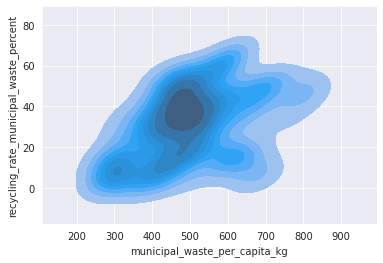

In [73]:
from scipy.stats import pearsonr
joined_plot = joined[["municipal_waste_per_capita_kg","recycling_rate_municipal_waste_percent"]].dropna()
#determine the annotation's position
r = "r = " + str(round(pearsonr(joined_plot["municipal_waste_per_capita_kg"], joined_plot["recycling_rate_municipal_waste_percent"])[0], 2))
sns.kdeplot(data=joined, x= "municipal_waste_per_capita_kg", y="recycling_rate_municipal_waste_percent",  fill = True).annotate(r, xy=(50, 50), xycoords="data");

In [74]:
#check the correlation btw. "waste" and "recycle" (0.45 is medium, ok)
joined["municipal_waste_per_capita_kg"].corr(joined["recycling_rate_municipal_waste_percent"])

0.43324813034586757

In [76]:
#check the correlation btw. "waste" and "population" (1,33)
joined["municipal_waste_per_capita_kg"].corr(joined["population"])

1.3293586024134287e-05

In [77]:
#check the correlation btw. "recycle" and "population" (0,14 low)
joined["recycling_rate_municipal_waste_percent"].corr(joined["population"])

0.14422822677446187

<function matplotlib.pyplot.show(close=None, block=None)>

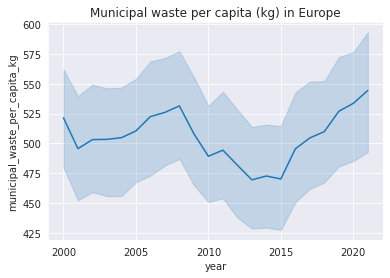

In [79]:
#plot Dataset 1
sns.lineplot(x="year", y="municipal_waste_per_capita_kg", data = joined)
plt.title('Municipal waste per capita (kg) in Europe')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

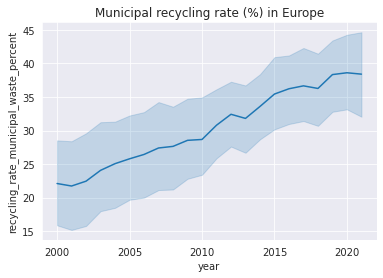

In [80]:
#plot Dataset 2
sns.lineplot(x="year", y="recycling_rate_municipal_waste_percent", data = joined)
plt.title('Municipal recycling rate (%) in Europe')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

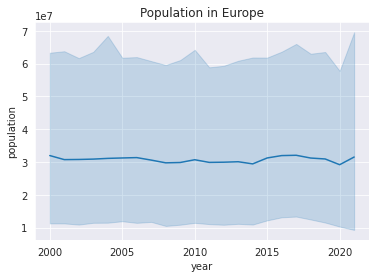

In [81]:
#plot Dataset 3
sns.lineplot(x="year", y="population", data = joined)
plt.title('Population in Europe')
plt.show

In [82]:
! pip install jupyter-dash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 38.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 44.7 MB/s eta 0:00:00


In [83]:
from jupyter_dash import JupyterDash
import dash
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Output, Input
import plotly.graph_objects as go
import plotly.express as px

<ipython-input-83-5a9b5e11e5c1>:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html
<ipython-input-83-5a9b5e11e5c1>:4: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc


In [84]:
#a bar chart with a year-dropdown for Dataset 1
app = JupyterDash(__name__)


app.layout = html.Div([
    html.Header('Select the year:', style={"textAlign":"left"}),
    dcc.Dropdown(id='year_dropdown',
                 options= joined["year"].unique(),
                 value = 2000),
    dcc.Graph(id='waste_chart'),
])
   

@app.callback(Output("waste_chart", "figure"),
              Input("year_dropdown", "value"))
def sync_input(year_selection):
  #fix the height size to see all countries' names
  year_joined = joined[joined['year'] == 2000].sort_values('municipal_waste_per_capita_kg'
          , ascending=True)
  len_countries = len(year_joined["row_num"].unique())
  
  fig = px.bar(joined.loc[joined["year"]==year_selection].sort_values("municipal_waste_per_capita_kg", ascending=False),
               x="municipal_waste_per_capita_kg",
               y="country_name",
               height = 20 + (25*len_countries),
               title = f'Europe & Municipal waste generation per capita (kg) - Year {year_selection}',
  )
  fig.update_layout(yaxis_categoryorder='total ascending')
  
  return fig

app.run_server(mode="inline")

<IPython.core.display.Javascript object>

In [86]:
#a bar chart with a year-dropdown for Dataset 1
app = JupyterDash(__name__)


app.layout = html.Div([
    html.Header('Select the year:', style={"textAlign":"left"}),
    dcc.Dropdown(id='year_dropdown',
                 options= joined["year"].unique(),
                 value = 2000),
    dcc.Graph(id='recycle_chart'),
])
   

@app.callback(Output("recycle_chart", "figure"),
              Input("year_dropdown", "value"))
def sync_input(year_selection):
  #fix the height size to see all countries' names
  year_joined = joined[joined['year'] == 2000].sort_values('recycling_rate_municipal_waste_percent'
          , ascending=True)
  len_countries = len(year_joined["row_num"].unique())
  
  fig1 = px.bar(joined.loc[joined["year"]==year_selection].sort_values("recycling_rate_municipal_waste_percent", ascending=False),
               x="recycling_rate_municipal_waste_percent",
               y="country_name",
               height = 20 + (25*len_countries),
               title = f'Europe & Municipal recycling rate (%)- Year {year_selection}',
  )
  fig1.update_layout(yaxis_categoryorder='total ascending')
  
  return fig1

app.run_server(mode="inline")

<IPython.core.display.Javascript object>

In [90]:
app = JupyterDash(__name__)

app.layout = html.Div([
    dcc.Graph(id='graph-with-slider'),
    dcc.Slider(
        joined['year'].min(),
        joined['year'].max(),
        step=None,
        value=joined['year'].min(),
        marks={str(year): str(year) for year in joined['year'].unique()},
        id='year-slider'
    )
])

@app.callback(
    Output('graph-with-slider', 'figure'),
    Input('year-slider', 'value'))
def update_figure(selected_year):

    filtered_joined = joined[joined["year"]== selected_year]

    fig3 = px.scatter(filtered_joined, x="recycling_rate_municipal_waste_percent",
                      y="municipal_waste_per_capita_kg", size="population",
                      hover_name="country_name",
                      log_x=True, size_max=55,
                       title = f'Waste generation and recycling in Europe btw. 2000-2021')

    fig3.update_layout(transition_duration=500)

    return fig3

app.run_server(mode="inline")

<IPython.core.display.Javascript object>